In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random

#### Loading the data

In [2]:
df = pd.read_excel('query_bidoni_economia_domestica.xlsx', engine = 'openpyxl', parse_dates=['Data']  )
# df = pd.read_excel('query_bidoni_economia_domestica.xlsx', engine = 'openpyxl', parse_dates=['Data'], index_col='Data' )

In [3]:
del df['Unnamed: 5']
del df['Unnamed: 6']

In [4]:
df.drop(df.tail(11).index,inplace=True)

In [5]:
pd.options.display.float_format = '{:,.0f}'.format

In [6]:
df['Usciti da Economia Domestica'].replace('', np.nan, inplace=True)

In [7]:
pd.options.display.max_rows

60

In [8]:
pd.set_option('display.max_rows', 60)

In [9]:
df = df.replace(r'\s+', np.nan, regex=True)

In [10]:
df = df.dropna(axis=0, subset=['Usciti da Economia Domestica'])

In [11]:
df['Data'] = pd.to_datetime(df['Data'])

#### predicting the number of bins used every week 


In [12]:
## IT does not have the trend 

In [13]:
df.dtypes

Giorno                                         object
Data                                   datetime64[ns]
Entrati In Economia Domestica                  object
Usciti da Economia Domestica                   object
Numero Bidoni in Economia Domestica           float64
dtype: object

In [14]:
# df.groupby([df['Data'].dt.strftime('%W')])['Usciti da Economia Domestica'].sum()
df['Data'] = pd.to_datetime(df['Data'])

## Converting the daily data to a weekly data as the bins are bought and distributed once in a week. 

In [15]:
df1 = df.resample('W', on='Data')['Usciti da Economia Domestica'].sum()
# print(df1) 
# df1.plot(kind='line')

## Auto correlation

Autocorrelation measures a set of current values against a set of past values to see if they correlate.

This is done to check if there is any correlation between the number of bins used every week. 

The plot shows there is not significant auto correlation between the number of bins used. 

/var/folders/l7/kgls0lzx1rbc1hrkt3fmx_d80000gn/T/ipykernel_2013/1104097475.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


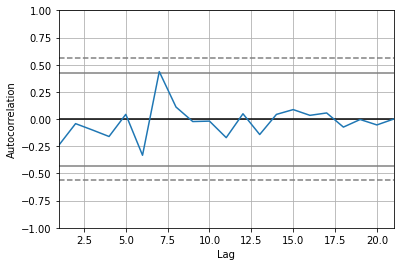

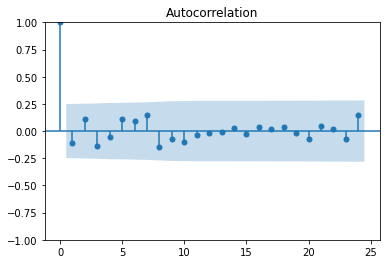

In [16]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics import tsaplots

#### Autocorrelation measures a set of current values against a set of past values to see if they correlate. It is heavily used in time series analysis and forecasting.
autocorrelation_plot(df1)

fig = tsaplots.plot_acf(df['Usciti da Economia Domestica'], lags=24)

plt.show()

In [17]:
df1

Data
2021-03-07    190
2021-03-14    110
2021-03-21    108
2021-03-28    124
2021-04-04    125
2021-04-11     99
2021-04-18     36
2021-04-25    190
2021-05-02    172
2021-05-09     43
2021-05-16    175
2021-05-23     53
2021-05-30    116
2021-06-06     37
2021-06-13    114
2021-06-20    178
2021-06-27    141
2021-07-04    153
2021-07-11     62
2021-07-18    110
2021-07-25     79
Freq: W-SUN, Name: Usciti da Economia Domestica, dtype: object

## Checking the monthly usage of bins 

In [19]:
df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Usciti da Economia Domestica'].mean()

Data
2021-03   89
2021-04   37
2021-05   28
2021-06   31
2021-07   40
Freq: M, Name: Usciti da Economia Domestica, dtype: float64

#### There is an hike during the month of March which could be because of the COVID. 

In [20]:
pd.PeriodIndex(df['Data'], freq="D")

PeriodIndex(['2021-03-04', '2021-03-11', '2021-03-18', '2021-03-23',
             '2021-03-25', '2021-03-30', '2021-04-01', '2021-04-08',
             '2021-04-09', '2021-04-12', '2021-04-14', '2021-04-15',
             '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-21',
             '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-27',
             '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-06',
             '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
             '2021-05-14', '2021-05-17', '2021-05-18', '2021-05-19',
             '2021-05-20', '2021-05-21', '2021-05-27', '2021-05-28',
             '2021-05-31', '2021-06-04', '2021-06-07', '2021-06-08',
             '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-15',
             '2021-06-16', '2021-06-17', '2021-06-21', '2021-06-24',
             '2021-06-25', '2021-06-28', '2021-06-29', '2021-06-30',
             '2021-07-01', '2021-07-05', '2021-07-07', '2021-07-08',
             '2021-07-09', '2021-0

In [21]:
# fig, ax = plt.subplots(figsize=(12, 12))

# # Add x-axis and y-axis
# ax.bar(df['Data'],
#        df['Usciti da Economia Domestica'],
#        color='purple')

# # Set title and labels for axes
# ax.set(xlabel="Date",
#        ylabel="Precipitation (inches)",
#        title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

# plt.setp(ax.get_xticklabels(), rotation=45)


# plt.show()



# def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

# plot_df(df, x=df['data'], y=df['Usciti da Economia Domestica'], title='Usciti da Economia Domestica')    
import datetime
# dates = df['Data']

# x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in dates]
# print(x_values)

# ax1 = df1.plot.scatter(x= 'Data', y='Usciti da Economia Domestica', c='DarkBlue')

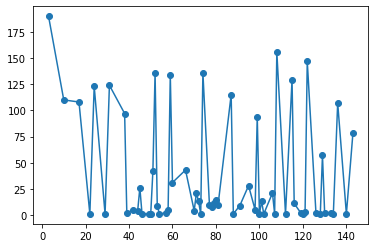

In [22]:
df['Usciti da Economia Domestica'].plot(marker='o');

In [24]:
df2 = pd.DataFrame(np.random.randint(0,100,size=(365, 4)))
df2

,0,1,2,3
0,19,63,95,45
1,64,99,83,84
2,43,56,95,79
3,48,6,90,49
4,93,92,74,64
...,...,...,...,...
360,35,84,38,99
361,51,54,30,28
362,54,65,23,95
363,15,10,31,29


#### Simulating the data for an year based on the existing values just randomly generating the values based on the data we already have. 

In [106]:
n = 365   
df1 = pd.DataFrame(dict(
Entrati_In_Economia_Domestica=np.random.randint(1, max(df['Entrati In Economia Domestica']), size=n),
   Usciti_da_Economia_Domestica=np.random.randint(1, max(df['Usciti da Economia Domestica']), size=n),
    Numero_Bidoni_in_Economia_Domestica=np.random.randint(1, max(df['Numero Bidoni in Economia Domestica']), size=n),
    numero_di_byte_restituiti=np.random.randint(1, max(df['Usciti da Economia Domestica']), size=n)
))

In [26]:
df1

,Entrati_In_Economia_Domestica,Usciti_da_Economia_Domestica,Numero_Bidoni_in_Economia_Domestica,numero_di_byte_restituiti
0,250,157,83,143
1,202,146,106,92
2,391,16,262,169
3,378,158,202,128
4,210,184,273,19
...,...,...,...,...
360,419,180,267,163
361,418,40,43,27
362,5,160,212,22
363,98,97,212,71


In [27]:
# df1.apply(lambda row: row.Entrati_In_Economia_Domestica + row.b, axis=1)
df['Usciti da Economia Domestica'][3]

190

In [28]:
day = 24 * 60 * 60
year = 365.2425 * day


def load_dataframe() -> pd.DataFrame:
    """ Create a time series x sin wave dataframe. """
    df = pd.DataFrame(columns=['data', 'Entrati_In_Economia_Domestica','Usciti_da_Economia_Domestica','Numero_Bidoni_in_Economia_Domestica'])
    df.data = pd.date_range(start='2017-01-01', end='2020-03-01', freq='W')
    df['Entrati_In_Economia_Domestica'] = np.random.randint(50, 200,size = len(df))
    mask = np.random.choice([1, 0], df['Entrati_In_Economia_Domestica'].shape, p=[.4, .6]).astype(bool)
    df['Entrati_In_Economia_Domestica'][mask] = 0
    s = df['Entrati_In_Economia_Domestica']
    
#     df.(Entrati_In_Economia_Domestica)
#     df.sin = 1 + np.sin(df.date.astype('int64') // 1e9 * (2 * np.pi / year))
#     df.sin = (df.sin * 100).round(2)
    
    df.data = df.data.apply(lambda d: d.strftime('%Y-%m-%d'))
    return df

train_df = load_dataframe()

/var/folders/l7/kgls0lzx1rbc1hrkt3fmx_d80000gn/T/ipykernel_2013/3134563180.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Entrati_In_Economia_Domestica'][mask] = 0


In [29]:
# Random generation of Usciti_da_Economia_Domestica coloumn. 
train_df['Usciti_da_Economia_Domestica'] = train_df['Entrati_In_Economia_Domestica'].apply(lambda x: np.random.randint(20, x) if x!= 0 else x)

In [107]:
# calculating number of bins left in the storage area. 
train_df['Numero_Bidoni_in_Economia_Domestica'] = train_df['Entrati_In_Economia_Domestica'] - train_df['Usciti_da_Economia_Domestica']

In [31]:
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    train_df[field_name] = train_df['Usciti_da_Economia_Domestica'].shift(inc)

#drop null values
train_df = train_df.dropna().reset_index(drop=True)


In [32]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Define the regression formula
model = smf.ols(formula='Usciti_da_Economia_Domestica ~ lag_1 + lag_2 + lag_3+ lag_4+ lag_5+ lag_6+ lag_7+ lag_8+ lag_9+ lag_10 + lag_11', data=train_df)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.0030939557361109316


In [33]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_model = df1.drop(['Entrati_In_Economia_Domestica','Numero_Bidoni_in_Economia_Domestica','numero_di_byte_restituiti'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-6:].values

In [34]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [35]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [36]:
# !pip3 install tensorflow

In [37]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split


In [38]:
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False)

2021-11-11 23:27:38.549727: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-11 23:27:38.901105: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
359/359 [==============================] - 2s 1ms/step - loss: 0.3296
Epoch 2/100
359/359 [==============================] - 0s 1ms/step - loss: 0.3294
Epoch 3/100
359/359 [==============================] - 0s 795us/step - loss: 0.3294
Epoch 4/100
359/359 [==============================] - 0s 782us/step - loss: 0.3293
Epoch 5/100
359/359 [==============================] - 0s 902us/step - loss: 0.3293
Epoch 6/100
359/359 [==============================] - 0s 860us/step - loss: 0.3293
Epoch 7/100
359/359 [==============================] - 0s 1ms/step - loss: 0.3292
Epoch 8/100
359/359 [==============================] - 0s 912us/step - loss: 0.3292
Epoch 9/100
359/359 [==============================] - 0s 899us/step - loss: 0.3292
Epoch 10/100
359/359 [==============================] - 0s 958us/step - loss: 0.3292
Epoch 11/100
359/359 [==============================] - 0s 929us/step - loss: 0.3292
Epoch 12/100
359/359 [==============================] - 0s 861us/step - loss: 0.

359/359 [==============================] - 0s 914us/step - loss: 0.3288
Epoch 98/100
359/359 [==============================] - 0s 955us/step - loss: 0.3288
Epoch 99/100
359/359 [==============================] - 0s 969us/step - loss: 0.3288
Epoch 100/100
359/359 [==============================] - 0s 860us/step - loss: 0.3288


In [39]:
y_pred = model.predict(X_test,batch_size=1)
#for multistep prediction, you need to replace X_test values with the predictions coming from t-1

In [42]:
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
#     print(np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

In [43]:
pred_test_set_inverted[0][0]


97.10157638788225

In [44]:
#create dataframe that shows the predicted sales
result_list = []
bins_dates = list(train_df[-47:].data)
used_number = list(train_df[-47:]['Usciti_da_Economia_Domestica'])
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0])
    result_dict['data'] = bins_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales

In [45]:
df_result

,pred_value,data
0,97,2019-04-21
1,97,2019-04-28
2,97,2019-05-05
3,97,2019-05-12
4,97,2019-05-19
5,97,2019-05-26


#### The plot of the predicted bins.

In [109]:
from chart_studio import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

plot_data = [
#     go.Scatter(
#         x=np.arange(0, len(df1['Usciti_da_Economia_Domestica']), 1),
#         y=df1['Usciti_da_Economia_Domestica'],
# #         name='actual'
#     ),
        go.Scatter(
        x=np.arange(0, len(df1['Usciti_da_Economia_Domestica']), 1),
        y=df1['Usciti_da_Economia_Domestica'],
        name='predicted'
    )
    
]
plot_layout = go.Layout(
        title='bins Prediction'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [110]:
# pd.date_range(start="2018-09-09",end="2020-02-02").to_pydatetime()

In [48]:
import warnings
warnings.filterwarnings('ignore')

#### Data simulation for three years

In [118]:
day = 24 * 60 * 60
year = 365.2425 * day


def load_dataframe() -> pd.DataFrame:
    """ Create a time series x sin wave dataframe. """
    df = pd.DataFrame(columns=['data', 'Entrati_In_Economia_Domestica','Usciti_da_Economia_Domestica','Numero_Bidoni_in_Economia_Domestica'])
    df.data = pd.date_range(start='2017-01-01', end='2020-03-01', freq='W')
    df['Entrati_In_Economia_Domestica'] = np.random.randint(50, 200,size = len(df))
    mask = np.random.choice([1, 0], df['Entrati_In_Economia_Domestica'].shape, p=[.4, .6]).astype(bool)
    df['Entrati_In_Economia_Domestica'][mask] = 0
    s = df['Entrati_In_Economia_Domestica']
    
#     df.(Entrati_In_Economia_Domestica)
#     df.sin = 1 + np.sin(df.date.astype('int64') // 1e9 * (2 * np.pi / year))
#     df.sin = (df.sin * 100).round(2)
    
    df.data = df.data.apply(lambda d: d.strftime('%Y-%m-%d'))
    return df

train_df = load_dataframe()

In [119]:
# s = train_df['Entrati_In_Economia_Domestica']
# train_df['Usciti_da_Economia_Domestica'] = np.random.randint(50, Entrati_In_Economia_Domestica,size = len(df))

In [120]:
train_df['Usciti_da_Economia_Domestica'] = train_df['Entrati_In_Economia_Domestica'].apply(lambda x: np.random.randint(20, x) if x!= 0 else x)

In [121]:
train_df['Numero_Bidoni_in_Economia_Domestica'] = train_df['Entrati_In_Economia_Domestica'] - train_df['Usciti_da_Economia_Domestica']

In [122]:
#adding lags
for inc in range(1,10):
    field_name = 'lag_' + str(inc)
    train_df[field_name] = train_df['Usciti_da_Economia_Domestica'].shift(inc)

# #drop null values
# train_df = train_df.dropna().reset_index(drop=True)

In [123]:
train_df

,data,Entrati_In_Economia_Domestica,Usciti_da_Economia_Domestica,Numero_Bidoni_in_Economia_Domestica,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9
0,2017-01-01,193,53,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-08,0,0,0,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-15,172,50,122,0,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-22,100,48,52,50,0,53,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-29,62,30,32,48,50,0,53,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2020-02-02,175,96,79,0,127,0,47,74,0,47,0,31
162,2020-02-09,0,0,0,96,0,127,0,47,74,0,47,0
163,2020-02-16,146,86,60,0,96,0,127,0,47,74,0,47
164,2020-02-23,0,0,0,86,0,96,0,127,0,47,74,0


In [124]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Define the regression formula
model = smf.ols(formula='Usciti_da_Economia_Domestica ~ lag_1+ lag_2 + lag_3+ lag_7+ lag_8 ', data=train_df)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.0288069055339516


#### plot of number of bins in the storage.

In [127]:
plot_data = [
    go.Scatter(
        x=train_df['data'],
        y=train_df['Numero_Bidoni_in_Economia_Domestica'],
    )
]

plot_layout = go.Layout(
        title='the difference between the used and the entered bins'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [128]:
#create dataframe for transformation from time series to supervised
df_supervised = train_df.drop(['Usciti_da_Economia_Domestica'],axis=1)
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = train_df['Numero_Bidoni_in_Economia_Domestica'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)


In [129]:
train_df

,data,Entrati_In_Economia_Domestica,Usciti_da_Economia_Domestica,Numero_Bidoni_in_Economia_Domestica,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9
0,2017-01-01,193,53,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-08,0,0,0,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-15,172,50,122,0,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-22,100,48,52,50,0,53,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-29,62,30,32,48,50,0,53,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2020-02-02,175,96,79,0,127,0,47,74,0,47,0,31
162,2020-02-09,0,0,0,96,0,127,0,47,74,0,47,0
163,2020-02-16,146,86,60,0,96,0,127,0,47,74,0,47
164,2020-02-23,0,0,0,86,0,96,0,127,0,47,74,0


In [130]:
df_supervised

,data,Entrati_In_Economia_Domestica,Numero_Bidoni_in_Economia_Domestica,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2017-03-26,196,65,0,99,2,0,125,112,27,32,52,122,0,140
1,2017-04-02,157,104,65,0,99,2,0,125,112,27,32,52,122,0
2,2017-04-09,0,0,104,65,0,99,2,0,125,112,27,32,52,122
3,2017-04-16,0,0,0,104,65,0,99,2,0,125,112,27,32,52
4,2017-04-23,163,45,0,0,104,65,0,99,2,0,125,112,27,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2020-02-02,175,79,0,39,0,30,19,0,152,0,96,0,0,16
150,2020-02-09,0,0,79,0,39,0,30,19,0,152,0,96,0,0
151,2020-02-16,146,60,0,79,0,39,0,30,19,0,152,0,96,0
152,2020-02-23,0,0,60,0,79,0,39,0,30,19,0,152,0,96


In [131]:
# # Import statsmodels.formula.api
# import statsmodels.formula.api as smf
# # Define the regression formula
# model = smf.ols(formula='Numero_Bidoni_in_Economia_Domestica ~ lag_1+ lag_3+ lag_4+ lag_5+ lag_6+  lag_9 ', data=df_supervised)
# # Fit the regression
# model_fit = model.fit()
# # Extract the adjusted r-squared
# regression_adj_rsq = model_fit.rsquared_adj
# print(regression_adj_rsq)

#### predicting the number of bins needed

In [137]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervised.drop(['Entrati_In_Economia_Domestica','data'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-46].values, df_model[-46:].values

In [138]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [139]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [140]:
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
108/108 [==============================] - 1s 904us/step - loss: 0.3918
Epoch 2/100
108/108 [==============================] - 0s 975us/step - loss: 0.2469
Epoch 3/100
108/108 [==============================] - 0s 913us/step - loss: 0.2413
Epoch 4/100
108/108 [==============================] - 0s 1ms/step - loss: 0.2389
Epoch 5/100
108/108 [==============================] - 0s 955us/step - loss: 0.2368
Epoch 6/100
108/108 [==============================] - 0s 920us/step - loss: 0.2346
Epoch 7/100
108/108 [==============================] - 0s 940us/step - loss: 0.2325
Epoch 8/100
108/108 [==============================] - 0s 929us/step - loss: 0.2305
Epoch 9/100
108/108 [==============================] - 0s 925us/step - loss: 0.2285
Epoch 10/100
108/108 [==============================] - 0s 926us/step - loss: 0.2266
Epoch 11/100
108/108 [==============================] - 0s 1ms/step - loss: 0.2248
Epoch 12/100
108/108 [==============================] - 0s 923us/step - loss: 

108/108 [==============================] - 0s 791us/step - loss: 0.1016
Epoch 99/100
108/108 [==============================] - 0s 887us/step - loss: 0.0999
Epoch 100/100
108/108 [==============================] - 0s 898us/step - loss: 0.0982


In [141]:
y_pred = model.predict(X_test,batch_size=1)
#for multistep prediction, you need to replace X_test values with the predictions coming from t-1


In [142]:
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    print(np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[[-0.77466929 -0.70909091 -0.40606061 -0.57575758 -1.         -0.22424242
  -1.         -0.46666667 -0.06666667  0.04242424  0.78181818 -0.53939394
  -0.52727273]]
[[-0.79829174 -1.         -0.70909091 -0.40606061 -0.57575758 -1.
  -0.22424242 -1.         -0.46666667 -0.06666667  0.04242424  0.78181818
  -0.53939394]]
[[-0.92184162 -0.57575758 -1.         -0.70909091 -0.40606061 -0.57575758
  -1.         -0.22424242 -1.         -0.46666667 -0.06666667  0.04242424
   0.78181818]]
[[-0.67387909 -0.91515152 -0.57575758 -1.         -0.70909091 -0.40606061
  -0.57575758 -1.         -0.22424242 -1.         -0.46666667 -0.06666667
   0.04242424]]
[[-0.78647006 -1.         -0.91515152 -0.57575758 -1.         -0.70909091
  -0.40606061 -0.57575758 -1.         -0.22424242 -1.         -0.46666667
  -0.06666667]]
[[-0.67382014 -1.         -1.         -0.91515152 -0.57575758 -1.
  -0.70909091 -0.40606061 -0.57575758 -1.         -0.22424242 -1.
  -0.46666667]]
[[-0.15403597 -0.75757576 -1.         -1

In [143]:
#create dataframe that shows the predicted sales
result_list = []
bins_dates = list(train_df[-47:].data)
used_number = list(train_df[-47:]['Numero_Bidoni_in_Economia_Domestica'])
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0])
    result_dict['data'] = bins_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales

In [95]:
df_result

,pred_value,data
0,-11,2019-04-21
1,27,2019-04-28
2,41,2019-05-05
3,40,2019-05-12
4,14,2019-05-19
5,2,2019-05-26
6,33,2019-06-02
7,54,2019-06-09
8,57,2019-06-16
9,2,2019-06-23


#### Plot of the bins required(prediction) vs actual bins required

In [144]:
from chart_studio import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

plot_data = [
    go.Scatter(
        x=np.arange(0, len(train_df['Numero_Bidoni_in_Economia_Domestica']), 1),
        y=train_df['Numero_Bidoni_in_Economia_Domestica'],
        name='actual'
#         name='actual'
    ),
        go.Scatter(
        x=np.arange(0, len(df_result['pred_value']), 1),
        y=df_result['pred_value'],
        name='predicted'
    )
    
]
plot_layout = go.Layout(
        title='bins Prediction'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#### we can see there is no dramatic differences in both the series.

In [145]:
# print (df.shape)
# print (df.head())
# print (df.columns)

In [146]:
# train_df 

In [147]:
# mask = np.random.choice([1, 0], df['Entrati In Economia Domestica'].shape, p=[.1, .9]).astype(bool)

In [148]:
# df['Entrati In Economia Domestica']

In [149]:
# len(train_df)

In [150]:
# import numpy as np

# a = np.random.randint(1, 200,size = n)
# mask = np.random.choice([1, 0], a.shape, p=[.4, .6]).astype(bool)
# a[mask] = 0

In [151]:
# a


In [152]:
#create dataframe for transformation from time series to supervised
df_supervised = train_df.drop(['Numero_Bidoni_in_Economia_Domestica'],axis=1)
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = train_df['Usciti_da_Economia_Domestica'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)



In [153]:
df_supervised

,data,Entrati_In_Economia_Domestica,Usciti_da_Economia_Domestica,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2017-03-26,196,131,0,78,141,0,31,25,50,30,48,50,0,53
1,2017-04-02,157,53,131,0,78,141,0,31,25,50,30,48,50,0
2,2017-04-09,0,0,53,131,0,78,141,0,31,25,50,30,48,50
3,2017-04-16,0,0,0,53,131,0,78,141,0,31,25,50,30,48
4,2017-04-23,163,118,0,0,53,131,0,78,141,0,31,25,50,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2020-02-02,175,96,0,127,0,47,74,0,47,0,31,0,0,83
150,2020-02-09,0,0,96,0,127,0,47,74,0,47,0,31,0,0
151,2020-02-16,146,86,0,96,0,127,0,47,74,0,47,0,31,0
152,2020-02-23,0,0,86,0,96,0,127,0,47,74,0,47,0,31


In [154]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervised.drop(['Entrati_In_Economia_Domestica','data'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-46].values, df_model[-46:].values

In [155]:
#create dataframe that shows the predicted sales
result_list = []
bins_dates = list(train_df[-47:].data)
used_number = list(train_df[-47:]['Entrati_In_Economia_Domestica'])
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0])
    result_dict['data'] = bins_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales